<a href="https://colab.research.google.com/github/JuliaHdzQ/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA4_GRUPO_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMOS GENÉTICOS**

> GRUPO A08

>Lucia Valdera Gayoso, Susana Villar Polvorosa, Julia Hernández Quintas

> ## Introducción

A la hora de resolver problemas en los que se busca encontrar soluciones eficientes, una herramienta muy utilizada son los algoritmos genéticos, cuyo funcionamiento está inspirado en la evolucón biológica.

En esta práctica, hemos desarrollado un algoritmo genético, utilizando la librería DEAP, en Python, especializada en este tipo de algoritmos.

Con ella desarrollaremos un algoritmo genético con el que encontraremos los valores máximos y mínimos de dos funciones de adaptación, para un número n de generaciones. Lo haremos en dos ejercicios distintos.


Para ellos debemos tomar un conjunto de decisiones, que conformarán el algoritmo genético, y que iremos explicando a lo largo de la práctica.

> ## EJERCICIO 1

1.- Encontrar los máximos de la función "picos"

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio $$\{x,y\} \in [-100,100]$$

Instalamos e importamos las librerías que necesitaremos para el desarrollo de el algoritmo genético.

In [30]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Definición del problema y de la población inicial.

In [31]:
# Fijamos la semilla,para que se mantengan los mismos números aleatorios
random.seed(0)

# Generamos los números pseudo-aleatorios en (x,y)
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)


x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


Definimos la función objetivo o función fitness y la representamos.

Esta función, que observamos gráficamente, nos permite saber la calidad de un solución candidata, es decir para unos valores x e y.

x=  [-100.          -97.97979798  -95.95959596  -93.93939394  -91.91919192
  -89.8989899   -87.87878788  -85.85858586  -83.83838384  -81.81818182
  -79.7979798   -77.77777778  -75.75757576  -73.73737374  -71.71717172
  -69.6969697   -67.67676768  -65.65656566  -63.63636364  -61.61616162
  -59.5959596   -57.57575758  -55.55555556  -53.53535354  -51.51515152
  -49.49494949  -47.47474747  -45.45454545  -43.43434343  -41.41414141
  -39.39393939  -37.37373737  -35.35353535  -33.33333333  -31.31313131
  -29.29292929  -27.27272727  -25.25252525  -23.23232323  -21.21212121
  -19.19191919  -17.17171717  -15.15151515  -13.13131313  -11.11111111
   -9.09090909   -7.07070707   -5.05050505   -3.03030303   -1.01010101
    1.01010101    3.03030303    5.05050505    7.07070707    9.09090909
   11.11111111   13.13131313   15.15151515   17.17171717   19.19191919
   21.21212121   23.23232323   25.25252525   27.27272727   29.29292929
   31.31313131   33.33333333   35.35353535   37.37373737   39.39393939
  

Text(0.5, 0, 'f(x,y)')

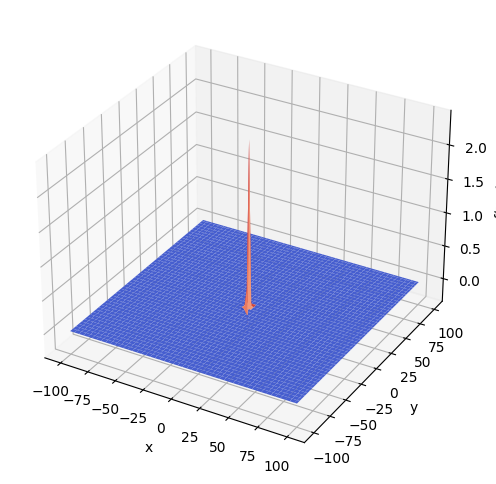

In [32]:
# Definimos nuestra función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res = 3*(1-x[0])**2*math.exp(-(x[0]**2)-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*math.exp(-x[0]**2 - x[1]**2) - 1/3*math.exp(-(x[0]+1)**2 - x[1]**2)
    return res,

# Creamos vectores que abarcan todo el dominio
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
print('x= ', x)
print('y= ', y)

# Evaluamos todos los valores del espacio generado
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(100, 100))

# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")


Evaluamos el rango en el que esta nuestra función, pues gráficamente se observa como es mucho menor al rango que hemos tomado.

De esta forma, será suficiente con reducir el rango a [-5 , 5]

Text(0.5, 0, 'f(x,y)')

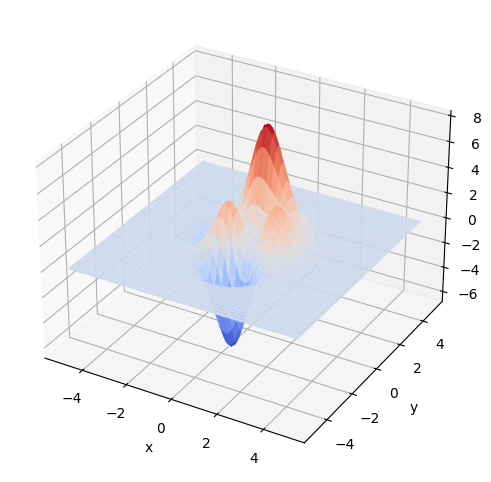

In [33]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Evaluamos todos los valores del espacio generado
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(100, 100))

# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

### **DEFINICIÓN DEL PROBLEMA**

En este punto definiremos las características necesarias que componenen el algoritmo genético.

Reescribiremos la función fitness, o función objetivo,en el nuevo rango elegido. En su interior aparecen las **restricciones**, que x e y deben cumplir.

**CREACIÓN DE INDIVIDUOS (TIPO)**: creamos tambien la estructura, o tipo de nuestros individuos. En este caso va a ser una lista, que dentro contiene el valor de la función objetivo, para ese individuo.

**FUNCIÓN DE ADAPTACIÓN / FITNESS**: definimos nuestra función de adaptación, que en este caso será una función de maximización. En ella aparece la restriccion obligatoria que deben cumplir x e y. Por lo que la gestión de las restricciones, se lleva a cabo evaluandolas dentro de la función de fitness.

In [34]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema en el rango reducido
    """
    for i in range(len(x)):
        if x[i] > 5 or x[i] < -5:
            return -1,
    res = 3*(1-x[0])**2*math.exp(-(x[0]**2)-(x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5)*math.exp(-x[0]**2 - x[1]**2) - 1/3*math.exp(-(x[0]+1)**2 - x[1]**2)

    return res,

**TOOLBOX**: El siguiente paso, será crear nuestra toolbox, donde se van a resgistrar las  operaciones genéticas, y los elementos y funciones necesarias para realizar el algoritmo genético.

1. GENERACIÓN DE INDIVIDUOS (aleatorios)

Creamos los genes aleatorios, llamando a la función ya creada para realizar este paso, y definimos número de veces que llama a dicha función: dos, pues tenemos dos cromosomas, por cada individuo.
Una vez generados, los guardaremos en la estructura que creamos al principio : creator.Individual

2. CREACIÓN DE POBLACIÓN:

Para ello, llamamos a la función creación de individuo, tantas veces como individuos tenga nuestra población, y este va número va a ser 16, veamos porqué:

Tomando el rango (-5,5) , la distancia máxima en el interior es 10

log2(10) = 3.28 --> esto nos indica, que cada cromosoma debe ser representado con 3.28 bits, es decir 4 bits.
Puesto que tenemos 2 cromosomas, necesitamos en total 2*4 = 8 bits
Siendo nuestra l = 8, el rango de la población debe estar en [l,2l] = [8,16]

3. GENERACIÓN DE GENES: para la creación de individuos, generamos valores aleatorios para cada gen del cromosoma, valores que estarán entre el rango que hemos elegido -5 y 5.


In [35]:
toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5, 5)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

### Operadores genéticos

Definimos ahora, todos los operadores genéticos, y porque elegimos estos valores para ellos:

**PUNTO DE CRUCE :** es el 'punto' o la posición entre los bits, en el que se dividen los crosmosomas de los padres, en cabeza y cola, y que por tanto decide en que punto se produce el cruce. Este punto se calcula de forma aleatoria

**MUTACIÓN :** utilizamos la mutación Gaussiana, que intercambia el valor del gen elegido, de 1 a 0, o a la inversa si es 0 pasará a ser 1.

  - mu (Media):hemos seleccionado `mu=0.2` para centrar las mutaciones alrededor de valores cercanos a la posición actual de un gen. Esto permite mutaciones moderadas evitando cambios fuertes.

  - sigma (Desviación Estándar):con `sigma=0.3`, hemos elegido una desviación estándar intermedia permitiendo mutaciones significativas pero controladas. Si aumentamos el valor se pueden generar mutaciones excesivas, mientras que reducirlo limitaría la exploración.

  - ipnb : indpb=0.3 significa que, en promedio, alrededor del 30% de los genes individuales mutarán en cada operación de mutación, permitiendo una variabilidad genética adecuada.

**SELECCION DE PAREJAS CANDIDATAS:** hemos elegido selección por torneo, pues es la que mejor nos funciona para nuestro problema. Hemos elegido un número de parejas participantes en el torneo igual a 3.

Se seleccionarán entonces 3 parejas aleatoriamente, que participarán en el torneo. La pareja cuyo valor fitness o valor de aptitud sea mejor (pues buscamos el valor maximo ---> maximización) será la ganadora del torneo, y será seleccionada como pareja candidata. Esto significa que será una de las parejas que participarán en el cruzamiento, dando lugar a nuevos hijos.


En conjunto, estos valores fueron elegidos después de pruebas iterativas y ajustes buscando optimizar la convergencia del algoritmo genético para este problema específico.


In [36]:
# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.2,
                 sigma= 0.3, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

Vamos a almacenar los valores máximos, mínimos y promedio de la función objetivo o fitness en cada generación, y creamos la funcion que nos permita graficar la evolución de dichos valores con el paso de las generaciones.

In [37]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 16])
    ax1.legend(["Min","Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

PROBABILIDADES DE CRUCE, MUTACION Y Nº INDIVIDUOS:

- **Probabilidad de cruce**: Fijamos `CXPB=0.2`, indicando que hay una baja probabilidad de cruces entre individuos. Esto se hace para favorecer la exploración de nuevas soluciones pero sin depender demasiado del cruce.
- **Probabilidad de mutación**: Se estableció `MUTPB=0.5`, lo que significa que aproximadamente la mitad de los genes de cada individuo experimentará mutaciones en cada generación.Cuanto mayor sea esta, mayor será la diversidad genética generada. Esta probabilidad equilibrada busca un compromiso entre la exploración y la explotación.
- **Número de generaciones**: ha de ser un número lo suficientemente grande, para que se produzcan las evoluciones genéticas necesarias, pero tratando de evitar sobrepasar el punto óptimo.
Para elegir este valor, hemos observado gráficamente, en que punto está el mayor valor de la maximización de la función fitness, en el que además con el paso de las generaciones siguientes se mantiene constante.


gen	nevals	avg      	std    	min     	max     
0  	16    	-0.083689	0.50495	-1.93304	0.666799
1  	11    	0.259742 	0.717475	-0.138178	2.8994  
2  	10    	0.603428 	0.706335	-0.174641	2.8994  
3  	9     	1.65349  	1.13002 	0.0372399	4.28903 
4  	12    	3.49311  	1.43022 	1.07044  	6.4617  
5  	11    	5.05034  	1.17393 	3.37149  	7.31345 
6  	11    	5.88163  	1.64207 	2.53948  	7.63493 
7  	9     	7.37253  	0.441126	6.06312  	7.80441 
8  	11    	7.24307  	1.08939 	3.53933  	7.95065 
9  	10    	7.57133  	0.74752 	4.71668  	7.95065 
10 	9     	7.27355  	1.49966 	2.70246  	7.95065 
11 	8     	7.60467  	0.937509	3.99148  	7.95065 
12 	9     	6.96709  	2.33679 	0.266868 	7.95065 
13 	10    	7.57962  	0.826913	5.22792  	7.95065 
14 	3     	7.87425  	0.295916	6.72817  	7.95065 
15 	11    	7.80184  	0.392361	6.4346   	7.95065 
16 	11    	7.89866  	0.235968	6.99243  	8.07696 
17 	13    	7.68886  	0.697094	5.76111  	8.07696 
18 	7     	7.49862  	1.58347 	1.51931  	8.07696 
19 	10    	7.90113  	0.4

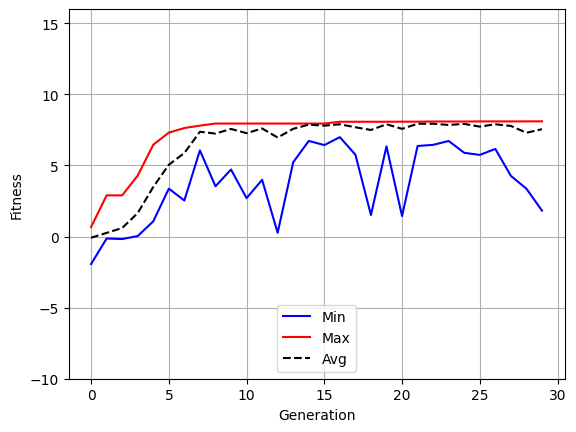

In [38]:
def main():
    random.seed(25)
    CXPB, MUTPB, NGEN = 0.2, 0.5, 29
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

**ELECCIÓN DE LA SEMILLA**

Durante el desarrollo y ajuste de nuestro algoritmo genético, realizamos varias pruebas para encontrar la configuración que proporcionara los resultados más consistentes y deseables. En este proceso, experimentamos con diferentes semillas para la generación de números aleatorios y observamos que al establecer random.seed(25), el algoritmo mostraba una convergencia más rápida y una mejora en el rendimiento general.

La elección del número 25 como semilla no tiene un significado intrínseco; más bien, fue el resultado de iteraciones y ajustes. La consistencia en los resultados y la reproducción de los mismos resultados en múltiples ejecuciones fueron consideraciones clave. La semilla 25 demostró ser efectiva en términos de reproducibilidad y convergencia, facilitando así la comparación y evaluación de diferentes configuraciones del algoritmo.


> ### VARIACION EN EL PUNTO DE CRUCE / Two-Point Crossover

Ahora, vamos a cambiar nuestro algoritmo, de forma que no solo tengamos un punto de cruce, sino dos.

Veamos como se realiza la selección de los dos puntos de cruce, así como el proceso del cruce posterior:
Cada pareja seleccionada, tendrá ahora dos puntos de cruce, y por tanto el fenotipo de cada individuo se divirá en cabeza, centro, y cola.

Así pues para la generación de los hijos, el hijo 1 tendra la cabeza y cola del padre 1, y la parte central del padre 2. De la mima forma el hijo 2, tendrá la cabeza y cola del padre 2, y la parte central del padre 1.

**ANALISIS DE LA EXPORACIÓN GENERADA Y CONVERGENCIA PARA DOS P. CRUCE**

Al elegir dos puntos de cruce, se favorece la exploración del algoritmo. Esto se debe, a que el fenotipo de los hijos, varía más con respecto al de los padres, al elegir un segmento completo (centro) de los padres e intercambarlo, para dar lugar a los dos hijos.

Sin embargo, para nuestro modelo, utilizando los mismos parámetros, no se produce un aumento significativo de la exploración, por lo que podemos considerar que los parámetros siguen siendo correctos para la convergencia del algoritmo con dos puntos de cruce.




gen	nevals	avg      	std    	min     	max     
0  	16    	-0.083689	0.50495	-1.93304	0.666799
1  	11    	0.0942564	0.847764	-1.47   	2.97475 
2  	12    	0.436212 	0.922448	-1.47   	2.97475 
3  	10    	1.20641  	1.29971 	-1.47   	3.91202 
4  	10    	2.65248  	0.971509	0.666799	4.4572  
5  	11    	3.42835  	1.1958  	1.40809 	6.17481 
6  	9     	4.68468  	1.17334 	2.97475 	7.87795 
7  	11    	5.94513  	1.07571 	3.55069 	7.87795 
8  	11    	6.81085  	0.889643	5.47817 	7.96108 
9  	12    	7.77333  	0.300249	7.01423 	8.00161 
10 	12    	7.59508  	0.921548	4.25283 	8.02384 
11 	10    	7.66302  	0.755953	5.38539 	8.02384 
12 	11    	7.74391  	0.507681	5.94227 	8.02384 
13 	8     	7.56797  	1.13247 	4.36742 	8.03291 
14 	12    	7.49209  	1.15022 	4.30135 	8.03291 
15 	10    	7.6039   	1.08844 	3.67069 	8.08803 
16 	10    	7.99156  	0.121799	7.5685  	8.08803 
17 	10    	7.87142  	0.573503	5.71606 	8.10077 
18 	14    	7.98335  	0.375888	6.53039 	8.10077 
19 	10    	7.42269  	1.38893 	2.98076 	8.1

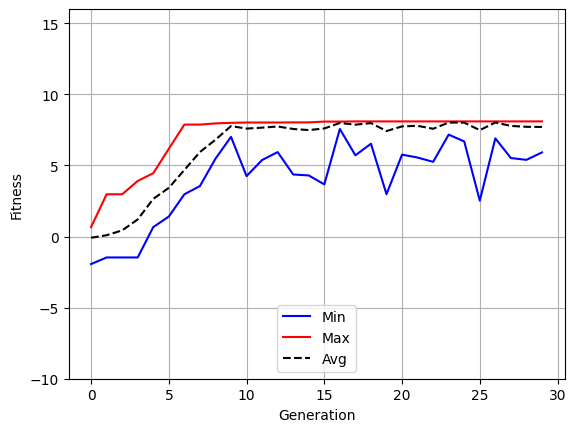

In [39]:
toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5, 5)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.2,
                 sigma= 0.3, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)


def main():
    random.seed(25)
    CXPB, MUTPB, NGEN = 0.2, 0.5, 29
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook



best2, log2 = main()
print("Mejor fitness: %f" %best2[0].fitness.values)
print("Mejor individuo %s" %best2[0])
plot_evolucion(log2)

**COMPARACIÓN GRÁFICA DE MODELOS**

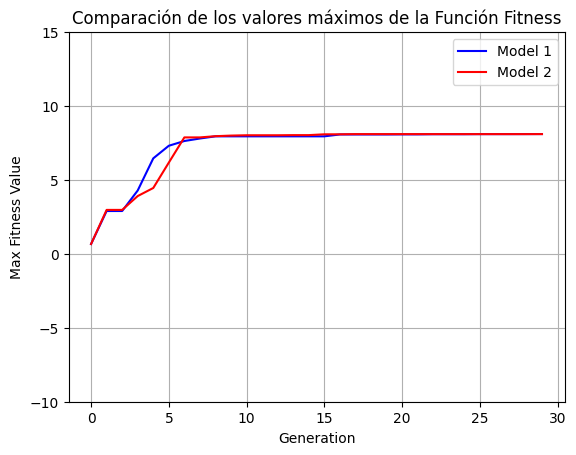

In [40]:
# Function to plot the evolution of the maximum fitness values
def plot_max_fitness(log, log2):
    gen1 = log.select("gen")
    max_fit1 = log.select("max")

    gen2 = log2.select("gen")
    max_fit2 = log2.select("max")

    fig, ax = plt.subplots()
    ax.plot(gen1, max_fit1, label="Model 1", color="blue")
    ax.plot(gen2, max_fit2, label="Model 2", color="red")

    ax.set_xlabel("Generation")
    ax.set_ylabel("Max Fitness Value")
    ax.legend()
    plt.title("Comparación de los valores máximos de la Función Fitness")
    plt.grid(True)

    ax.set_ylim([-10, 15])
    plt.show()

# Plot the evolution of the maximum fitness values for both models
plot_max_fitness(log, log2)

Como hemos mencionado antes, ambos algoritmos, usando uno y dos puntos de cruce, covergen de forma adecuada, consiguiendo un equilibrio entre exploración y explotación.

El valor de la función fitness para el individuo mejor adaptado en ambos casos es muy parecido, con algunos decimales de diferencia.

> ## EJERCICIO 2

2.- Dada la [Función de Rastringin](https://en.wikipedia.org/wiki/Rastrigin_function#:~:text=In%20mathematical%20optimization%2C%20the%20Rastrigin,has%20been%20generalized%20by%20Rudolph.), con A = 10 y  $$\{xi\} \in [-5.12,5.12]$$

Implementa dicha función en Python y minimízala para n=10

Compara el funcionamiento del Algoritmo Genético para cruce con un punto con cruce con dos puntos

Siguiendo los mismos pasos que en el algoritmo anterior, definimos la función objetivo o función fitness y la representamos gráficamente, en 3 dimensiones.

Text(0.5, 0, 'f(x,y)')

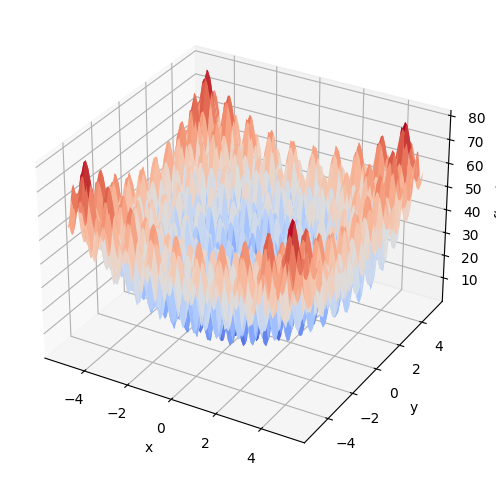

In [41]:
def funcion_rastrigin(x, A=10):

    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

x = [random.uniform(-5.12, 5.12) for i in range(10)]
y = [random.uniform(-5.12, 5.12) for i in range(10)]

# Generamos vectores que barran todo el dominio
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)

# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_rastrigin(val) for val in vals],(100, 100))

# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")


> ### MODELO UN PUNTO DE CRUCE

**DEFINICIÓN DEL MODELO**



Siguiendo los mismos pasos, que en el ejercicio 1, hemos realizado un algoritmos genético, ajustando gran parte de los parámetros de definición del modelo.

Esto se debe a que, a partir de la gráfica de la función fitness representada previamente, hemos observado como esta ocupa la mayor parte del rango elegido y además vemos como su forma es muy diferente a la anterior, pues en esta observamos numerosos máximos y mínimos locales.

Esto nos indica que no debemos centrarnos en regiones concretas, ya que nos podemos quedar atrapados en estos óptimos locales, sin llegar a la solución deseada.

Es por ello que a la hora de elgir parámetros, hemos tratado de buscar una mayor diversidad genética, que conllevará a una mayor exploración del algoritmo, sin que está sea demasiado alta provocando que el algoritmo no converja correctamente, o perdiendo información valiosa.

Los cambios más significativos en los parámetros, consiguiendo la convergencia del algoritmo han sido:

- MUTACIONES: la probabilidad de mutación se ha aumentado, por lo que el numero de genes mutados ha sido mayor, generando una mayor exploración

- CRUCES: la probabilidad de cruce, también ha incrementado para este modelo, por el mismo motivo, el numero de parejas candidatas, que finalmente se han cruzado ha sido mayor, y esto ha provocado mayor exploración.

gen	nevals	avg    	std    	min   	max    
0  	16    	37.8305	15.9118	8.6021	73.8418
1  	11    	25.8733	12.5669	6.11745	44.9099
2  	11    	13.5941	6.98837	6.11745	28.7605
3  	9     	11.3964	6.97128	4.97597	28.7821
4  	13    	9.2947 	5.62353	3.49724	26.4969
5  	14    	8.01572	4.23716	3.49724	20.0642
6  	13    	6.52528	3.88439	3.49724	17.2389
7  	16    	8.40621	8.1606 	2.15066	25.586 
8  	13    	6.02646	5.65161	2.15066	21.9123
9  	15    	4.91496	4.90628	2.15066	22.3875
10 	7     	3.06786	2.40437	2.15066	12.1646
11 	9     	4.53122	4.68345	1.37704	17.2109
12 	15    	6.68297	7.18783	1.17056	21.2392
13 	11    	5.68521	8.36889	1.17056	33.0065
14 	5     	2.42127	2.16251	1.17056	10.5045
15 	10    	2.31145	1.92182	1.17056	8.53377
16 	13    	5.7174 	9.38157	1.17056	31.3682
17 	12    	5.94949	9.06411	1.17056	34.5492
18 	9     	4.77676	8.24268	1.17056	31.8165
19 	14    	3.78775	6.28806	0.987289	23.4165
20 	12    	4.35092	6.39896	1.03717 	21.3824
21 	10    	2.31554	2.82687	0.584284	9.68833
22 	14    

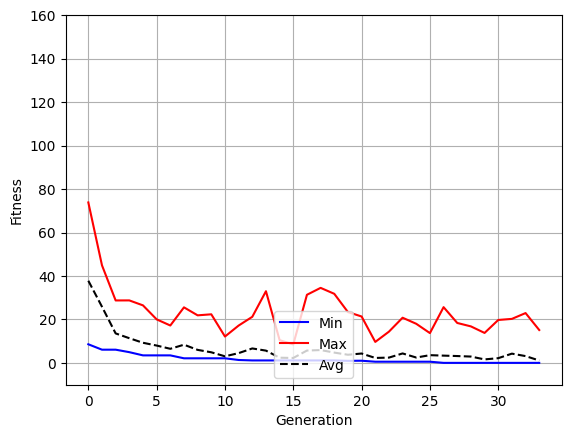

In [42]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


def funcion_rastrigin(x, A=10):

    x_array = np.array(x)
    n = len(x)
    return A * n + np.sum(x_array**2 - A * np.cos(2 * np.pi * x_array))


def funcion_objetivo(individual):
    """
    Función objetivo de nuestro problema en el rango reducido
    """
    for i in range(len(individual)):
        if individual[i] > 5.12 or individual[i] < -5.12:
            return +10,
    res = funcion_rastrigin(individual)

    return res,


toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.5,
                 sigma= 0.5, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

def main():
    random.seed(25)
    CXPB, MUTPB, NGEN = 0.51, 0.5, 33
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook


best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

> ### DOS PUNTOS DE CRUCE

En este caso, utilizamos dos puntos de cruce, que como explicamos previamente, utilizar dos puntos de cruce genera mayor exploración en el algoritmo.

Aún así tambien hemos ajustado algunos parámetros, para conseguir la exploración adecuada y la convergencia del algoritmo.

En comparación con el uso de un punto de cruce, hemos variado:

- sigma (0.55 - 0.33) la reducción de este parametro indica mutaciones mas pequeñas en promedio y esto implica más explotación, consiguiendo el equilibrio con la exploración generada y favoreciendo la convergencia.

- CXPB (0.5 - 0.29) de la misma forma hemos disminuido la probabilidad de cruce, de manera que menos parejas se han cruzado, consiguiendo igualmente mayor explotación, y equilibrando la exploración.


gen	nevals	avg    	std    	min    	max    
0  	16    	36.5946	15.7881	10.5579	80.1641
1  	13    	21.8205	9.66171	9.05739	41.0148
2  	14    	13.5691	6.11108	1.97936	25.1652
3  	10    	16.4097	9.7661 	1.97936	42.4867
4  	11    	13.9694	6.69613	3.77101	31.0008
5  	11    	14.4316	9.39863	5.13557	40.7677
6  	11    	12.4279	8.17057	3.77101	29.3829
7  	10    	10.8408	6.75503	3.77101	26.2496
8  	12    	13.4858	11.0466	3.4332 	39.5468
9  	10    	11.222 	6.68896	3.4332 	22.7956
10 	12    	10.2419	7.51722	1.44124	24.4201
11 	11    	12.6735	12.836 	0.579356	46.2521
12 	12    	7.00111	5.57299	0.579356	20.8079
13 	14    	7.37786	5.99501	0.569029	21.2961
14 	12    	13.0163	11.4337	0.569029	39.1536
15 	13    	12.7726	10.8621	0.569029	40.1845
16 	9     	8.91773	10.2852	0.569029	33.4006
17 	11    	4.8031 	7.1322 	0.569029	20.6821
18 	9     	4.40073	8.42007	0.0677053	30.0003
19 	8     	7.23114	10.3102	0.0677053	28.8985
20 	10    	7.34131	9.99719	0.0677053	32.9273
21 	10    	4.40985	7.607  	0.0677053	25.4

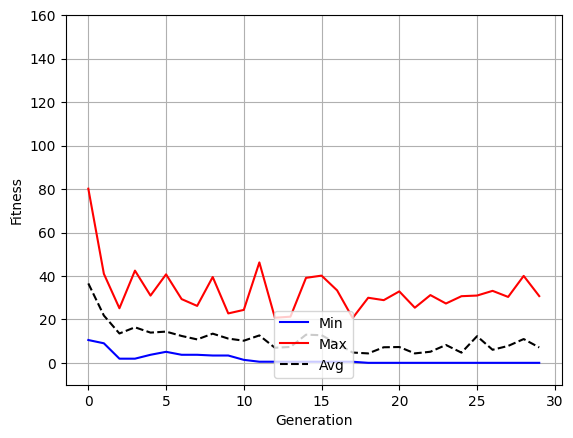

In [43]:
toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5, 5)

# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 16)

# Registro de operaciones genéticas
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.5,
                 sigma= 0.33, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)


def main():
    random.seed(25)
    CXPB, MUTPB, NGEN = 0.29, 0.6, 29
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook



best2, log2 = main()
print("Mejor fitness: %f" %best2[0].fitness.values)
print("Mejor individuo %s" %best2[0])
plot_evolucion(log2)